**Varsha Jaiswal**

**DATA SCIENCE INTERN**


Loading the required Libarary

In [217]:
import pandas as pd #Opertaion related to files
import numpy as np #For mathametical Computation
import matplotlib.pyplot as plt #For Visualization
%matplotlib inline
import seaborn as sns     #For higher lavel Of Visualization
sns.set()
import missingno as mi #For checking the missing value in the form of visualization
import os
import glob



**Data Anlysis**

In [218]:
#Reading the required file
amz_data=pd.read_csv("/content/HistoricalData_AMZN.csv",index_col="Date", parse_dates=True)

In [219]:
#Gives teh dimension of the data
amz_data.shape

(2516, 5)

In [220]:
#Gives the name pf the columns
amz_data.columns

Index(['Close/Last', 'Volume', 'Open', 'High', 'Low'], dtype='object')

In [221]:
#Shows starting 5 rows of data
amz_data.head()

,Close/Last,Volume,Open,High,Low
Date,,,,,
2021-06-09,$3281.15,2455530,$3272.87,$3297.58,$3270.7
2021-06-08,$3264.11,3416730,$3222.61,$3279.5321,$3218.01
2021-06-07,$3198.01,2215756,$3197.33,$3208,$3172.2
2021-06-04,$3206.22,2249749,$3212,$3221,$3198.81
2021-06-03,$3187.01,2398293,$3204.23,$3214.435,$3184.03


In [222]:
#Check wether data have any missing value or not if any than the ans will be True
amz_data.isnull().any()

Close/Last    False
Volume        False
Open          False
High          False
Low           False
dtype: bool

In [223]:
#gives the sum of missing values
amz_data.isnull().sum()

Close/Last    0
Volume        0
Open          0
High          0
Low           0
dtype: int64

In [224]:
#Gives the last five row of the dataset
amz_data.tail()

,Close/Last,Volume,Open,High,Low
Date,,,,,
2011-06-16,$183.65,6025431,$185.74,$187,$181.59
2011-06-15,$185.98,6310918,$188.04,$192.45,$185.3
2011-06-14,$189.96,3952911,$188.99,$190.72,$187.07
2011-06-13,$186.29,3867735,$186.81,$189.31,$184.86
2011-06-10,$186.53,3753267,$189.25,$190.77,$186.28


In [225]:
#Gives the information about the data
amz_data.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2516 entries, 2021-06-09 to 2011-06-10
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Close/Last  2516 non-null   object
 1   Volume      2516 non-null   int64 
 2   Open        2516 non-null   object
 3   High        2516 non-null   object
 4   Low         2516 non-null   object
dtypes: int64(1), object(4)
memory usage: 117.9+ KB


In [226]:
#Converting the Object data type column into float so that we can do the operation and visualization on the data
amz_data['Close/Last']=amz_data['Close/Last'].str.replace('$','').astype(float)
amz_data['Open']=amz_data['Open'].str.replace('$','').astype(float)
amz_data['High']=amz_data['High'].str.replace('$','').astype(float)
amz_data['Low']=amz_data['Low'].str.replace('$','').astype(float)

In [227]:
amz_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2516 entries, 2021-06-09 to 2011-06-10
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Close/Last  2516 non-null   float64
 1   Volume      2516 non-null   int64  
 2   Open        2516 non-null   float64
 3   High        2516 non-null   float64
 4   Low         2516 non-null   float64
dtypes: float64(4), int64(1)
memory usage: 117.9 KB


In [228]:
#It gives the mathmetical values for every column
amz_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Close/Last,2516.0,1.063464e+03,9.290121e+02,173.10,3.067725e+02,7.156100e+02,1.735715e+03,3.531450e+03
Volume,2516.0,4.207630e+06,2.295011e+06,881337.00,2.737498e+06,3.615334e+06,4.936622e+06,2.412413e+07
Open,2516.0,1.063904e+03,9.300560e+02,169.62,3.069775e+02,7.156100e+02,1.737780e+03,3.547000e+03
High,2516.0,1.075000e+03,9.403510e+02,174.55,3.107875e+02,7.201525e+02,1.750168e+03,3.554000e+03
Low,2516.0,1.051289e+03,9.179700e+02,166.97,3.034155e+02,7.112400e+02,1.713767e+03,3.486685e+03


In [229]:
#Gives the minimum value of every column
amz_data.min()

Close/Last       173.10
Volume        881337.00
Open             169.62
High             174.55
Low              166.97
dtype: float64

In [230]:
#Gives the maximum value of every column
amz_data.max()

Close/Last    3.531450e+03
Volume        2.412413e+07
Open          3.547000e+03
High          3.554000e+03
Low           3.486685e+03
dtype: float64

In [231]:
#Gives the unique value of every column
amz_data.nunique()

Close/Last    2487
Volume        2515
Open          2428
High          2455
Low           2467
dtype: int64

In [232]:
#Gives the values of repeated values 
amz_data.value_counts()

Close/Last  Volume    Open     High       Low      
3531.45     3931476   3547.00  3552.2500  3486.6850    1
358.74      1938439   360.12   361.0000   354.4000     1
360.62      5412991   371.00   372.8400   358.4000     1
360.13      3104857   357.22   360.5900   355.5000     1
359.80      3621653   359.86   364.7500   357.1700     1
                                                      ..
1402.05     4825682   1392.01  1402.5300  1380.9100    1
1392.05     10212940  1391.38  1414.0000  1355.3300    1
1390.00     11422520  1402.62  1458.9800  1320.7200    1
            8985040   1445.00  1459.8799  1385.1419    1
173.10      4279069   173.36   175.1700   172.4900     1
Length: 2516, dtype: int64

In [233]:
#Gives the values of repeated values for the specific column
amz_data["Volume"].value_counts()

2790354    2
2856959    1
2776391    1
3792379    1
3311640    1
          ..
4295320    1
2210454    1
2028181    1
3400701    1
4651311    1
Name: Volume, Length: 2515, dtype: int64

In [234]:
#Sort the Values of the column in the ascending order /descending order according to the colum name given whole data sorted in that formate
amz_data.sort_values('Volume' ,ascending = True)

,Close/Last,Volume,Open,High,Low
Date,,,,,
2019-12-24,1789.21,881337,1793.81,1795.57,1787.575
2012-12-24,258.62,986435,257.30,259.50,256.960
2015-12-24,662.79,1092970,663.35,664.68,660.600
2012-07-03,229.53,1335952,229.14,229.53,227.590
2015-07-02,437.71,1341938,437.00,438.20,433.480
...,...,...,...,...,...
2012-02-01,179.46,21328100,173.81,179.95,172.000
2015-07-24,529.42,21854940,578.99,580.57,529.350
2012-04-27,226.85,22084430,224.83,228.69,220.220


In [235]:
#Sort the Values of the specific column in the ascending order /descending order
amz_data["Open"].sort_values()

Date
2011-12-29     169.620
2011-12-30     173.360
2012-02-01     173.810
2011-12-22     175.090
2012-01-13     175.810
                ...   
2020-09-03    3485.000
2020-09-01    3489.580
2021-04-29    3505.098
2021-04-30    3525.120
2020-09-02    3547.000
Name: Open, Length: 2516, dtype: float64

**Visualization**

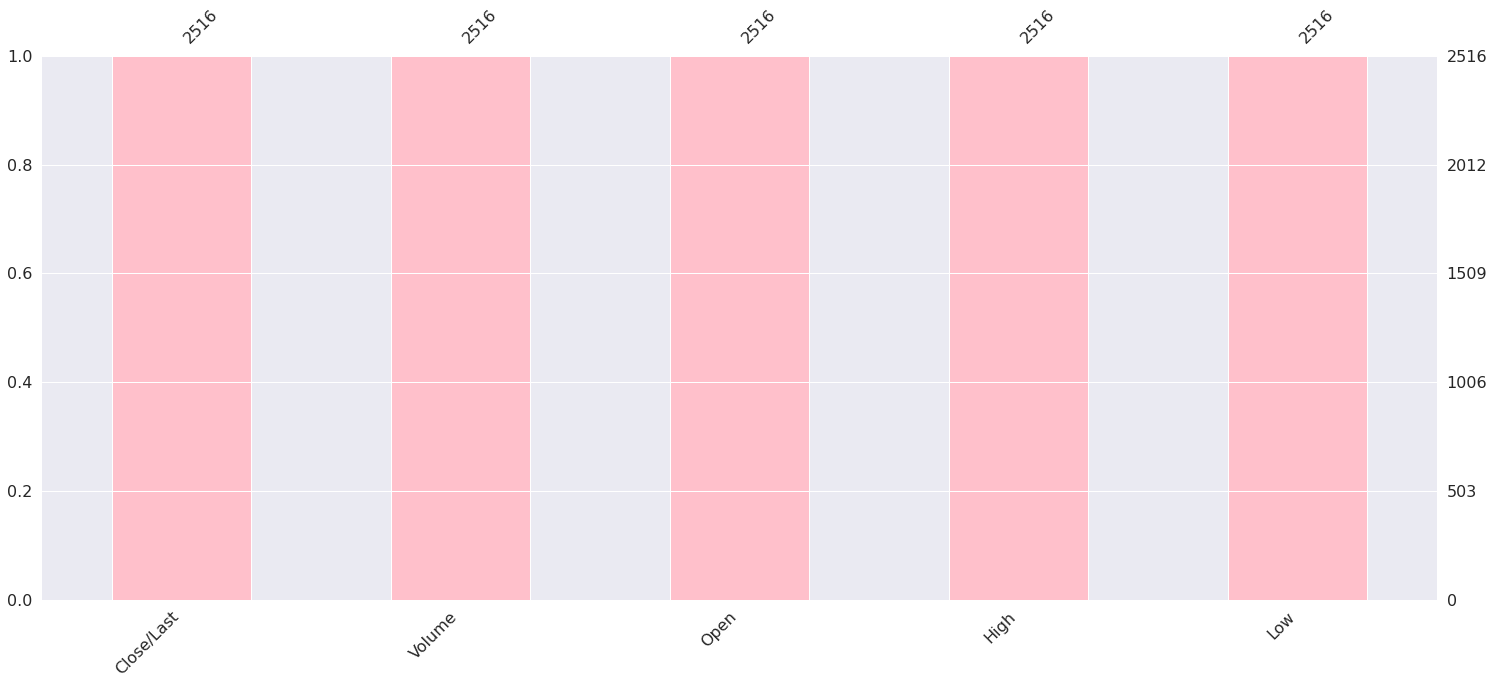

In [236]:
#Visualization for the missing value 
mi.bar(amz_data,color="pink")
plt.show()
#As we can see there is no misisng values

**Univariate Analysis**

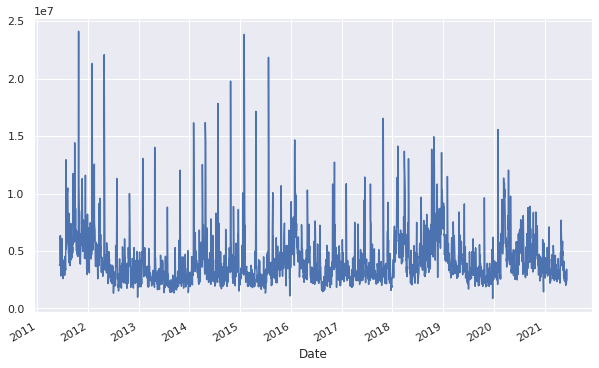

In [237]:
amz_data['Volume'].plot(figsize=(10,6))

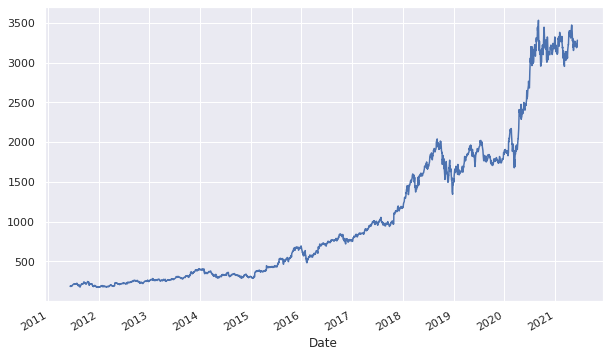

In [238]:
amz_data['Close/Last'].plot(figsize=(10,6))

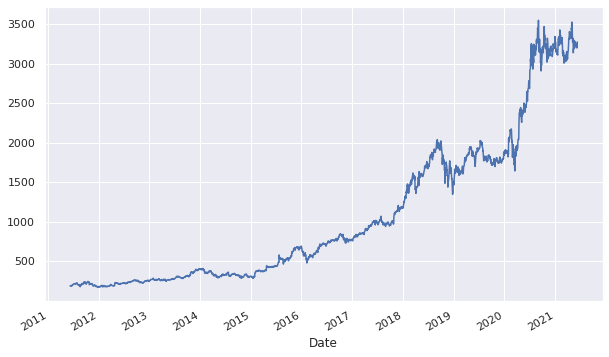

In [239]:
amz_data['Open'].plot(figsize=(10,6))

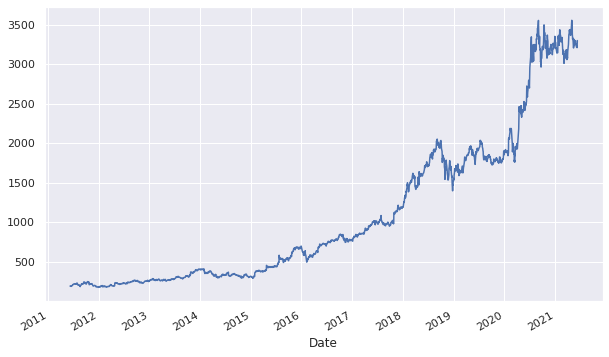

In [240]:
amz_data['High'].plot(figsize=(10,6))

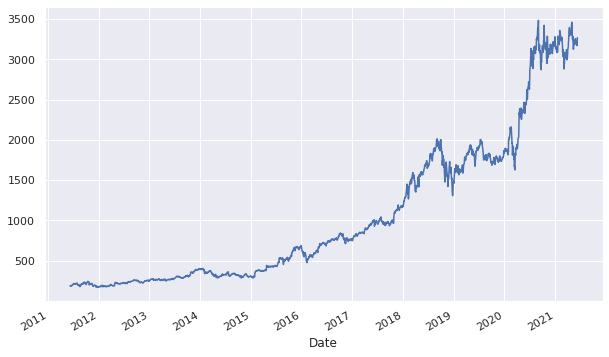

In [241]:
amz_data['Low'].plot(figsize=(10,6))

**Bivariate Analysis**

In [242]:
#Function to plot the graph
def plott(a1,a2):
  plt.scatter(x=a1,y=a2,data=amz_data)
  plt.xlabel(a1)
  plt.ylabel(a2)

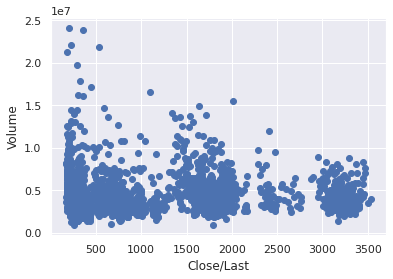

In [243]:
plott("Close/Last","Volume")

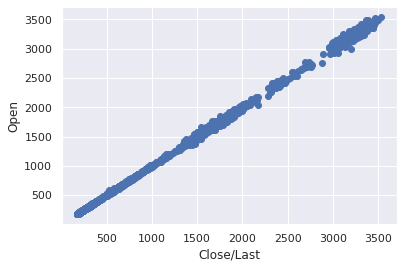

In [244]:
plott("Close/Last","Open")

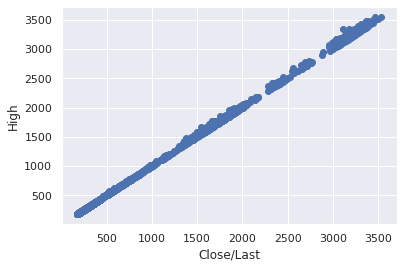

In [245]:
plott("Close/Last","High")

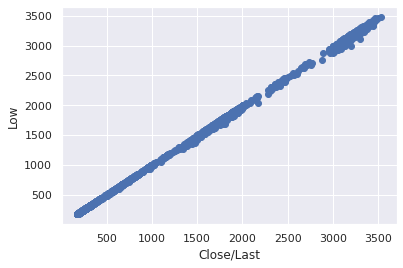

In [246]:
plott("Close/Last","Low")

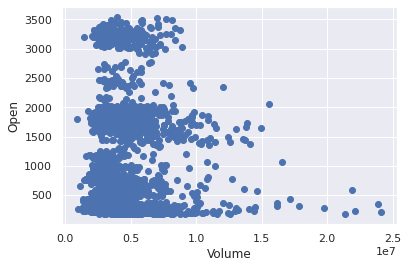

In [247]:
plott("Volume","Open")

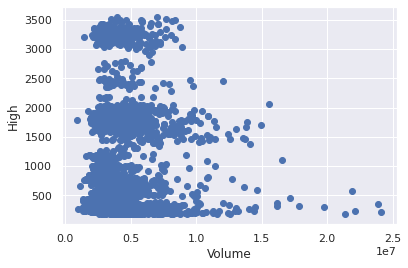

In [248]:
plott("Volume","High")

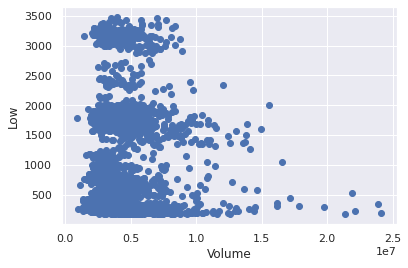

In [249]:
plott("Volume","Low")

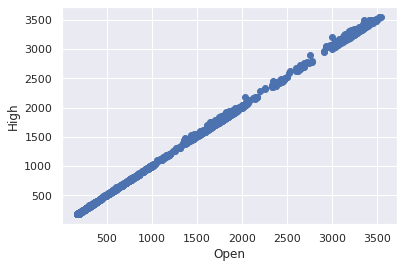

In [250]:
plott("Open","High")

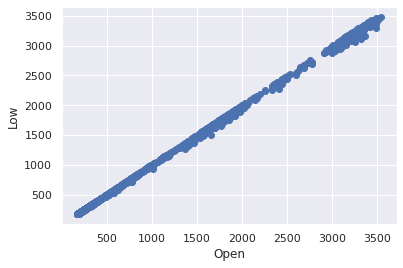

In [251]:
plott("Open","Low")

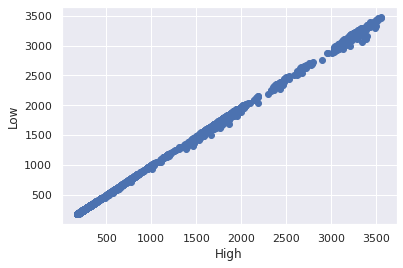

In [252]:
plott("High","Low")

In [253]:
amz_data.corr()

,Close/Last,Volume,Open,High,Low
Close/Last,1.000000,0.058536,0.999710,0.999857,0.999869
Volume,0.058536,1.000000,0.059707,0.063775,0.053753
Open,0.999710,0.059707,1.000000,0.999881,0.999835
High,0.999857,0.063775,0.999881,1.000000,0.999801
Low,0.999869,0.053753,0.999835,0.999801,1.000000


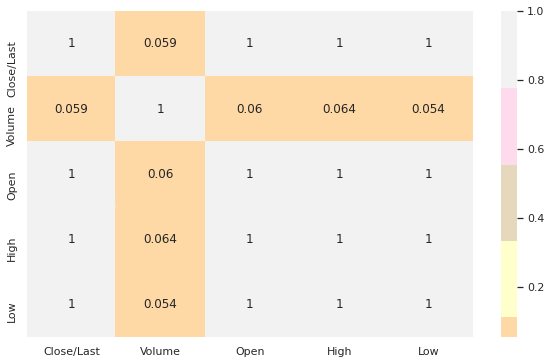

In [254]:
plt.figure(figsize=(10,6))
sns.heatmap(amz_data.corr(), center=0, cmap="Pastel1", annot=True)
plt.show()

**Text Preprocessing on the news article data**

In [255]:
#loading the required libraary for the text preprocessing
import os
import glob
import re
import nltk
import spacy
import string
pd.options.mode.chained_assignment = None
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize

In [256]:
#reading the files
df = pd.concat(
    map(pd.read_csv, ['/content/Headlines_2015.csv', '/content/Headlines_2016.csv','/content/Headlines_2017.csv','/content/Headlines_2018.csv','/content/Headlines_2019.csv','/content/Headlines_2020.csv','/content/Headlines_2021.csv']), ignore_index=True)
print(df)

            Date                                          Headlines
0     2015-01-01  What Can We Expect From Apple Inc. In 2015? 1 ...
1     2015-01-02  What to expect from Apple in 2015 beyond its s...
2     2015-01-03  Mountie: An inexpensive and innovative way to ...
3     2015-01-04  Donald Yacktman on the Sources of Moats, His C...
4     2015-01-05  SIM-free iPhone 6, 6 Plus reportedly debuting ...
...          ...                                                ...
2360  2021-06-19  Best pre-Prime Day smartwatch deals on Apple W...
2361  2021-06-20  iPhone 13 rumors: As Apple's fall event gets c...
2362  2021-06-21  Apple is shortening new free TV Plus trials fr...
2363  2021-06-22  Google likely to soon face antitrust claims ov...
2364  2021-06-23  French court sets date in Apple case over App ...

[2365 rows x 2 columns]


In [257]:
#mearging the files
joined_files = os.path.join("/content", "Headlines_*.csv")
joined_list = glob.glob(joined_files)
  

In [258]:
#Mearged files into one
df = pd.concat(map(pd.read_csv, joined_list), ignore_index=True)
df.to_csv( "Headline_merged.csv")

In [259]:
#Reading the mearged file
headline_data=pd.read_csv('/content/Headline_merged.csv')

In [260]:
#Conveting the file in to dataframe.
df=pd.DataFrame(headline_data)

In [261]:
#Gives the dimension of the data file
df.shape

(2365, 3)

In [262]:
#Gives the column name
df.columns

Index(['Unnamed: 0', 'Date', 'Headlines'], dtype='object')

In [263]:
#Will give starting 5 rows from the data
df.head()

,Unnamed: 0,Date,Headlines
0,0,2017-01-01,Glyphosate: Unsafe On Any Plate - What Is In Y...
1,1,2017-01-02,The 2 Worst Artificial Intelligence Stocks of ...
2,2,2017-01-03,Internet Of Things - The Feds Are Inside Your ...
3,3,2017-01-04,Apple pulls New York Times app from iTunes sto...
4,4,2017-01-05,"Microsoft, Apple, Alphabet The Most Crowded La..."


In [264]:
#drop the column ummaned because it is of no use
df.drop('Unnamed: 0',axis=1,inplace=True)

In [265]:
#Give the infomation about then data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2365 entries, 0 to 2364
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       2365 non-null   object
 1   Headlines  2365 non-null   object
dtypes: object(2)
memory usage: 37.1+ KB


In [266]:
#Converting the headlines data couln to string
df['Headlines']=df['Headlines'].astype('string')

In [267]:
#Converting the date data tye from obejt to date time data type
df['Date'] = pd.to_datetime(df['Date'])

In [268]:
#Give the strting 5 rows of the data
df.head()

,Date,Headlines
0,2017-01-01,Glyphosate: Unsafe On Any Plate - What Is In Y...
1,2017-01-02,The 2 Worst Artificial Intelligence Stocks of ...
2,2017-01-03,Internet Of Things - The Feds Are Inside Your ...
3,2017-01-04,Apple pulls New York Times app from iTunes sto...
4,2017-01-05,"Microsoft, Apple, Alphabet The Most Crowded La..."


In [269]:
 #Give sthe last 5 row of the data
 df.tail()

,Date,Headlines
2360,2020-12-27,Barron&quot;s Post-Christmas Picks And Pans: A...
2361,2020-12-28,Tesla Leaks: Apple and Amazon Music Support Wi...
2362,2020-12-29,While Apple Loses Copyright Claims against &qu...
2363,2020-12-30,AP: La. trooper under investigation dies in ap...
2364,2020-12-31,Apple knew a supplier was using child labor bu...


In [270]:
#Give the nulll value count in the column
df.isnull().sum()

Date         0
Headlines    0
dtype: int64

In [271]:
#Converting the headline data to lower case and forming one column Headline_lower to save the lower case data
df["Headlines_lower"]=df["Headlines"].str.lower()

In [272]:
#Stop word libraray
import nltk
nltk.download('stopwords')
", ".join(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


"i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, themselves, what, which, who, whom, this, that, that'll, these, those, am, is, are, was, were, be, been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but, if, or, because, as, until, while, of, at, by, for, with, about, against, between, into, through, during, before, after, above, below, to, from, up, down, in, out, on, off, over, under, again, further, then, once, here, there, when, where, why, how, all, any, both, each, few, more, most, other, some, such, no, nor, not, only, own, same, so, than, too, very, s, t, can, will, just, don, don't, should, should've, now, d, ll, m, o, re, ve, y, ain, aren, aren't, couldn, couldn't, didn, didn't, doesn, doesn't, hadn, hadn't, hasn, hasn't, haven, haven't, isn, isn't, ma, mightn, mightn't, mustn, mus

In [273]:
#Removing the stop word data from the Headline_lower column and saving that dat to the text_wo_stop column
STOPWORDS = set(stopwords.words('english'))
def remove_stopwords(text):
  return " ".join([word for word in str(text).split() if word not in STOPWORDS])
df["text_wo_stop"] = df["Headlines_lower"].apply(lambda text: remove_stopwords(text))
df.head()

,Date,Headlines,Headlines_lower,text_wo_stop
0,2017-01-01,Glyphosate: Unsafe On Any Plate - What Is In Y...,glyphosate: unsafe on any plate - what is in y...,glyphosate: unsafe plate - food? apple inc. (n...
1,2017-01-02,The 2 Worst Artificial Intelligence Stocks of ...,the 2 worst artificial intelligence stocks of ...,2 worst artificial intelligence stocks 2016 gr...
2,2017-01-03,Internet Of Things - The Feds Are Inside Your ...,internet of things - the feds are inside your ...,internet things - feds inside home india repor...
3,2017-01-04,Apple pulls New York Times app from iTunes sto...,apple pulls new york times app from itunes sto...,apple pulls new york times app itunes store ch...
4,2017-01-05,"Microsoft, Apple, Alphabet The Most Crowded La...","microsoft, apple, alphabet the most crowded la...","microsoft, apple, alphabet crowded large-cap n..."


In [274]:
#Removing the punctuation from the text_wo_stop column and saving that dat to the text_without_punct column
PUNCT_TO_REMOVE = string.punctuation
def remove_punctuation(text):
  return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))
df["text_without_punct"] = df["text_wo_stop"].apply(lambda text: remove_punctuation(text))
df["text_without_punct"].head()

0    glyphosate unsafe plate  food apple inc nasdaq...
1    2 worst artificial intelligence stocks 2016 gr...
2    internet things  feds inside home india report...
3    apple pulls new york times app itunes store ch...
4    microsoft apple alphabet crowded largecap name...
Name: text_without_punct, dtype: object

In [275]:
#Checking the infomation about thta data as we can see the data type is String for all the column except date
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2365 entries, 0 to 2364
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                2365 non-null   datetime64[ns]
 1   Headlines           2365 non-null   string        
 2   Headlines_lower     2365 non-null   string        
 3   text_wo_stop        2365 non-null   object        
 4   text_without_punct  2365 non-null   object        
dtypes: datetime64[ns](1), object(2), string(2)
memory usage: 92.5+ KB


In [276]:
#Pefroming stemming on the text_without_punct column and saving that data to the text_with_stemmed column
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
stemmer = PorterStemmer()
def stem_words(text):
    return " ".join([stemmer.stem(word) for word in text.split()])

df["text_with_stemmed"] = df["text_without_punct"].apply(lambda text: stem_words(text))
#df.head()

In [277]:

df["text_with_stemmed"].head(10)

0    glyphos unsaf plate food appl inc nasdaqaapl f...
1    2 worst artifici intellig stock 2016 grow bett...
2    internet thing fed insid home india reportedli...
3    appl pull new york time app itun store china u...
4    microsoft appl alphabet crowd largecap name da...
5    appl ceo tim cookquot pay slump along iphon sa...
6    ceo tim cook get pay cut applequot revenu decl...
7    amazon alexa domin voicecommand tech ce 2017 r...
8    hp inc hpq introduc multipl product ce la vega...
9    appl inc aapl graybil bartz assoc ltdquot 2nd ...
Name: text_with_stemmed, dtype: object

In [279]:
#Applying tokenization to the text_with_stemmed column and saving that data to the tokenize_text_with_stemmed column
nltk.download('punkt')
from nltk.tokenize import sent_tokenize
def token(text):
   return nltk.word_tokenize(text)
   #return sent_tokenize(text)
df["tokenize_text_with_stemmed"] = df["text_with_stemmed"].apply(lambda text:token(text))
df["tokenize_text_with_stemmed"].head(10)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


0    [glyphos, unsaf, plate, food, appl, inc, nasda...
1    [2, worst, artifici, intellig, stock, 2016, gr...
2    [internet, thing, fed, insid, home, india, rep...
3    [appl, pull, new, york, time, app, itun, store...
4    [microsoft, appl, alphabet, crowd, largecap, n...
5    [appl, ceo, tim, cookquot, pay, slump, along, ...
6    [ceo, tim, cook, get, pay, cut, applequot, rev...
7    [amazon, alexa, domin, voicecommand, tech, ce,...
8    [hp, inc, hpq, introduc, multipl, product, ce,...
9    [appl, inc, aapl, graybil, bartz, assoc, ltdqu...
Name: tokenize_text_with_stemmed, dtype: object

In [284]:
#Applying tokenization to the text_without_punct column and saving that data to the tokenize_text_without_stemmed column
nltk.download('punkt')
from nltk.tokenize import sent_tokenize
def token(text):
   return nltk.word_tokenize(text)
   #return sent_tokenize(text)
df["tokenize_text_without_stemmed"] = df["text_without_punct"].apply(lambda text:token(text)).astype("string")
#df["tokenize_text"].head(10)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [285]:
df.head()

,Date,Headlines,Headlines_lower,text_wo_stop,text_without_punct,text_with_stemmed,tokenize_text_with_stemmed,tokenize_text_without_stemmed
0,2017-01-01,Glyphosate: Unsafe On Any Plate - What Is In Y...,glyphosate: unsafe on any plate - what is in y...,glyphosate: unsafe plate - food? apple inc. (n...,glyphosate unsafe plate food apple inc nasdaq...,glyphos unsaf plate food appl inc nasdaqaapl f...,"[glyphos, unsaf, plate, food, appl, inc, nasda...","['glyphosate', 'unsafe', 'plate', 'food', 'app..."
1,2017-01-02,The 2 Worst Artificial Intelligence Stocks of ...,the 2 worst artificial intelligence stocks of ...,2 worst artificial intelligence stocks 2016 gr...,2 worst artificial intelligence stocks 2016 gr...,2 worst artifici intellig stock 2016 grow bett...,"[2, worst, artifici, intellig, stock, 2016, gr...","['2', 'worst', 'artificial', 'intelligence', '..."
2,2017-01-03,Internet Of Things - The Feds Are Inside Your ...,internet of things - the feds are inside your ...,internet things - feds inside home india repor...,internet things feds inside home india report...,internet thing fed insid home india reportedli...,"[internet, thing, fed, insid, home, india, rep...","['internet', 'things', 'feds', 'inside', 'home..."
3,2017-01-04,Apple pulls New York Times app from iTunes sto...,apple pulls new york times app from itunes sto...,apple pulls new york times app itunes store ch...,apple pulls new york times app itunes store ch...,appl pull new york time app itun store china u...,"[appl, pull, new, york, time, app, itun, store...","['apple', 'pulls', 'new', 'york', 'times', 'ap..."
4,2017-01-05,"Microsoft, Apple, Alphabet The Most Crowded La...","microsoft, apple, alphabet the most crowded la...","microsoft, apple, alphabet crowded large-cap n...",microsoft apple alphabet crowded largecap name...,microsoft appl alphabet crowd largecap name da...,"[microsoft, appl, alphabet, crowd, largecap, n...","['microsoft', 'apple', 'alphabet', 'crowded', ..."


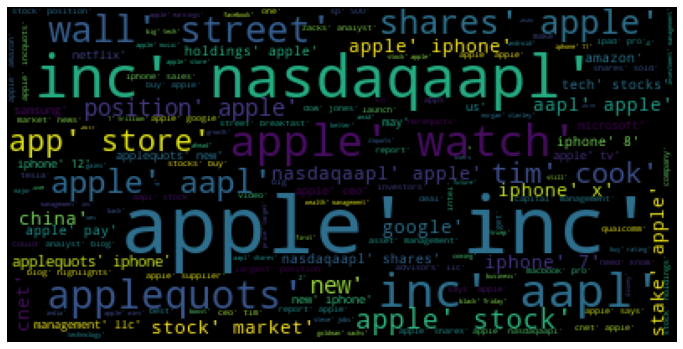

In [288]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
wc = WordCloud()

img = wc.generate_from_text(' '.join(df["tokenize_text_without_stemmed"]))
img.to_file('worcloud.jpeg')
plt.figure(figsize=(12,10))
plt.imshow(img)
plt.axis("off")
plt.show()
